In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# run only once
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Dataset: News Headline with Sarcasm

In [ ]:
# data wrangling
import os
import pandas as pd
import numpy as np
np.set_printoptions(edgeitems=10, linewidth=1000, formatter=dict(float=lambda x: "%.3g" % x))

# preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# modeling
import tensorflow as tf

## load data
import os
from pathlib import Path
home = str(Path.home())
base_dir = os.path.join(home, 'datasets/news-headlines-sarcasm')
file_name = 'Sarcasm_Headlines_Dataset.json'
json_file = os.path.join(base_dir, file_name)

df = pd.read_json(json_file, lines=True)
headlines = df.headline.to_list()
true_values = df.is_sarcastic.to_list()

## tokenize
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(headlines)
seq = tokenizer.texts_to_sequences(headlines)
padded_sequences = pad_sequences(seq)

true_values = np.array(true_values)

padded_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 40
trunc_type = 'post'
oov_tok = '<UNK>'

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

num_epoch = 10
model.fit(padded_sequences,
         true_values,
         epochs=4
         )

## IMDB Reviews Classification
https://www.tensorflow.org/tutorials/keras/text_classification

In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True, shuffle_files=True)

(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True,
    shuffle_files=True)

In [4]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=0.1.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    urls=['http://ai.stanford.edu/~amaas/data/sentiment/'],
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts

In [5]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [6]:
training_sentences[0]

'[  12   31   84  480   71    1  108 7748    9 1130  776  424   14   18\n    4  650   65    2    5 2411    4  471    6    1 3330   13 1200   52\n  101 3007    3   19  170   29  485 2554    2 2647    9    4 1000 3043\n   23 7995 2962  136    2 7455   49    9 1804 1182 2860    5    4  610\n   40 3208    2 5615 5608  131    9    4 2865 2145  413 7974  267 1943\n 1671 2898 8045  230   51   29 2055    2 5958  449    2    5 2292  475\n  230   33    1 6810 7961 7182    8   53   29   11 5083 4426   24   10\n   16   10   17 5083 4426 7961  815   20   41 4858  612    6 5115   66\n    2    5   12  674   15   23  402 5785    2   26   14  815   52    4\n 2654 5992   21    5 8002 4115   47   66    2    5   18   48   82 1767\n 2309    1  175 4974    6   71    1 7697  279   31  524  463    3 4108\n 1540    2 1551    2   26  446  376 2723 1595   82 1303   11    1  919\n    6  756 1161   47    5 7995 2962   25  242  101   12  129   60    1\n   66    3  373    6   82  208 7974  101 4271 8044 7975]'

In [7]:
training_labels[0]

1

In [8]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<UNK>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[0]))
print(training_sentences[0])

12 31 84 480 71 1 108 7748 9 1130 776 424 14 18 4 650 65 2 5 2411 4 471 6 1 3330 13 1200 52 101 3007 3 19 170 29 485 2554 2 2647 9 4 1000 3043 23 7995 2962 136 2 7455 49 9 1804 1182 2860 5 4 610 40 3208 2 5615 5608 131 9 4 2865 2145 413 7974 267 1943 1671 2898 8045 230 51 29 2055 2 5958 449 2 5 2292 475 230 33 1 6810 7961 7182 8 53 29 11 5083 4426 24 10 16 10 17 5083 4426 7961 815 20 41 4858 612 6 5115 66 2 5 12 674 15 23 402 5785
[  12   31   84  480   71    1  108 7748    9 1130  776  424   14   18
    4  650   65    2    5 2411    4  471    6    1 3330   13 1200   52
  101 3007    3   19  170   29  485 2554    2 2647    9    4 1000 3043
   23 7995 2962  136    2 7455   49    9 1804 1182 2860    5    4  610
   40 3208    2 5615 5608  131    9    4 2865 2145  413 7974  267 1943
 1671 2898 8045  230   51   29 2055    2 5958  449    2    5 2292  475
  230   33    1 6810 7961 7182    8   53   29   11 5083 4426   24   10
   16   10   17 5083 4426 7961  815   20   41 4858  612    6 5115   

## GRU

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 10
history = model.fit(
    padded,
    training_labels_final,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels_final)
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.5119 - accuracy: 0.7170 - val_loss: 0.3597 - val_accuracy: 0.8431
Epoch 2/10
25000/25000 [==============================] - 23s 930us/sample - loss: 0.3028 - accuracy: 0.8793 - val_loss: 0.3762 - val_accuracy: 0.8474
Epoch 3/10
25000/25000 [==============================] - 22s 888us/sample - loss: 0.2396 - accuracy: 0.9082 - val_loss: 0.3666 - val_accuracy: 0.8418
Epoch 4/10
25000/25000 [==============================] - 24s 943us/sample - loss: 0.1812 - accuracy: 0.9333 - val_loss: 0.4108 - val_accuracy: 0.8353
Epoch 5/10
25000/25000 [==============================] - 24s 974us/sample - loss: 0.1295 - accuracy: 0.9551 - val_loss: 0.4552 - val_accuracy: 0.8260
Epoch 6/10
25000/25000 [==============================] - 21s 829us/sample - loss: 0.0915 - accuracy: 0.9692 - val_loss: 0.5753 - val_accuracy: 0.8222
Epoch 7/10
25000/25000 [======================

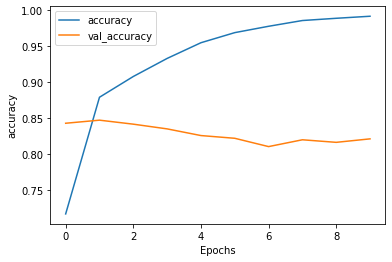

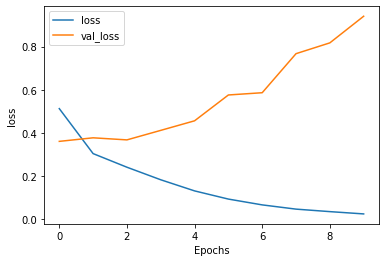

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# LSTM and Conv1D

In [ ]:
# LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
# Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()